"""Which Classifier is Should I Choose?
This is one of the most import questions to ask when approaching a machine learning
problem.I find it easier to just test them all at once. """

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

train = pd.read_csv('traintitanic.csv')
test = pd.read_csv('testtitanic.csv')

In [22]:
'''import sys


print ('Total Number of arguments:', len(sys.argv), 'arguments.')
print ('Argument List:', str(sys.argv))
print (sys.argv[0])
'''

"import sys\n\n\nprint ('Total Number of arguments:', len(sys.argv), 'arguments.')\nprint ('Argument List:', str(sys.argv))\nprint (sys.argv[0])\n"

In [23]:
#Data Preparation

In [24]:
'''# Swiss army knife function to organize the data
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species) # encode species strings
    classes = list(le.classes_)       # save column names for submission
    test_ids = test.id                # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.shape
'''

"# Swiss army knife function to organize the data\ndef encode(train, test):\n    le = LabelEncoder().fit(train.species) \n    labels = le.transform(train.species) # encode species strings\n    classes = list(le.classes_)       # save column names for submission\n    test_ids = test.id                # save test ids for submission\n    \n    train = train.drop(['species', 'id'], axis=1)  \n    test = test.drop(['id'], axis=1)\n    \n    return train, labels, test, test_ids, classes\n\ntrain, labels, test, test_ids, classes = encode(train, test)\ntrain.shape\n"

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.shape

(891, 12)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
train = train.drop(['Name'],axis=1)

In [29]:
train = train.drop(['Cabin'],axis=1)

In [30]:
train = train.drop(['PassengerId'],axis=1)

In [31]:
train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.25,S


In [32]:
train = train.drop(['Ticket','Embarked'],axis=1)

In [33]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [35]:
import seaborn as sns

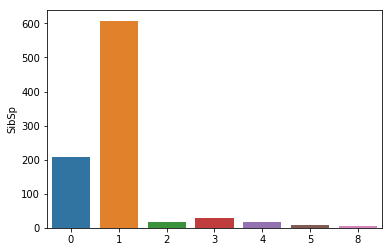

In [36]:
sns.barplot(x=train.SibSp.unique(), y=train.SibSp.value_counts(), data=train)   #$

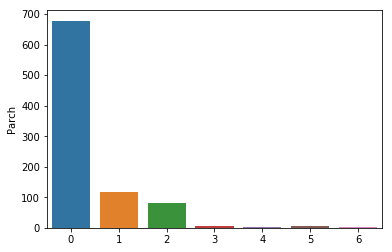

In [37]:
sns.barplot(x=train.Parch.unique(), y=train.Parch.value_counts(), data=train)   #$

In [38]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
test = test.drop(['Name','Cabin','Ticket','Embarked'],axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
for f in test.columns:
    if test[f].dtype=='object':
        lb=LabelEncoder()
        lb.fit(list(test[f].values))
        test[f]=lb.transform(list(test[f].values))

In [41]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


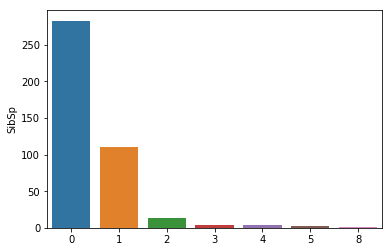

In [42]:
sns.barplot(x=test.SibSp.unique(), y=test.SibSp.value_counts(), data=test)

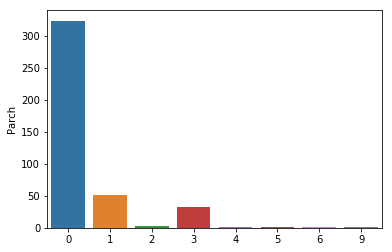

In [43]:
sns.barplot(x=test.Parch.unique(), y=test.Parch.value_counts(), data=test)   #$ Parch column having 9 parents in test missing 
                                                                          # in our training set.so removing parch column from 
                                                                          # training to keep accuracy in mind.

In [44]:
train = train.drop(['Parch'],axis=1)

In [45]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [46]:
test =test.drop(['Parch'],axis=1)

In [47]:
PassengerId = test['PassengerId']

In [48]:
test =test.drop(['PassengerId'],axis=1)

In [49]:
test.head()

,Pclass,Sex,Age,SibSp,Fare
0,3,1,34.5,0,7.8292
1,3,0,47.0,1,7.0000
2,2,1,62.0,0,9.6875
3,3,1,27.0,0,8.6625
4,3,0,22.0,1,12.2875


In [50]:
train.shape

(891, 6)

In [51]:
labels = train.Survived

In [52]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [53]:
train_y = train['Survived']

In [54]:
train = train.drop(['Survived'], axis=1)

In [55]:
from sklearn.preprocessing import LabelEncoder
for f in train.columns:
    if train[f].dtype=='object':
        lb=LabelEncoder()
        lb.fit(list(train[f].values))
        train[f]=lb.transform(list(train[f].values))

In [56]:
train=train.fillna(-99)

In [57]:
test = test.fillna(-99)

"""Stratified Train/Test Split - Stratification is necessary for this dataset because
there is a relatively large number of classes (100 classes for 990 samples). This 
will ensure we have all classes represented in both the train and test indices"""

In [58]:
sss = StratifiedShuffleSplit( n_splits=10, test_size=0.3, random_state=304)
print(sss.get_n_splits(train,labels))
for train_index, test_index in sss.split(train,labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

10


"""Sklearn Classifiers
Simply looping through 4 classifiers and printing the results. Obviously, these 
will perform much better after tuning their hyperparameters, but this gives you
a decent ballpark idea."""

In [59]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [123]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(C=27,gamma=0.005,probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    AdaBoostClassifier(),
    xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=-1,
                        max_depth=50,
                        booster='dart',
                        learning_rate=0.001,
                        silent=False,
                        subsample=1,
                        colsample_bytree=1)]

In [124]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 73.5075%
Log Loss: 3.1980218261206943
SVC
****Results****
Accuracy: 79.4776%
Log Loss: 0.5319328221522733
NuSVC
****Results****
Accuracy: 67.9104%
Log Loss: 0.5606133023911656
DecisionTreeClassifier
****Results****
Accuracy: 81.3433%
Log Loss: 6.3242614010011735
RandomForestClassifier
****Results****
Accuracy: 83.2090%
Log Loss: 0.6747499608182638
GaussianNB
****Results****
Accuracy: 78.7313%
Log Loss: 0.5883427227129506
AdaBoostClassifier
****Results****
Accuracy: 79.1045%
Log Loss: 0.6690373512787686
XGBClassifier
****Results****
Accuracy: 84.7015%
Log Loss: 0.459375663590965


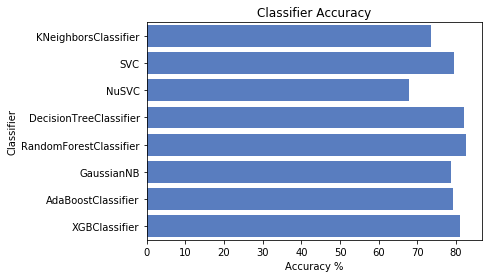

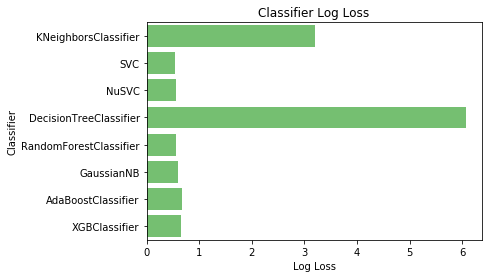

In [71]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [213]:
model1 = NuSVC()

In [214]:
model1.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [215]:
train_predictions = model1.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
acc

0.8171641791044776

In [216]:
model2 = SVC()

In [217]:
model2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [218]:
train_predictions = model2.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
acc

0.8208955223880597

In [219]:
model3 = SVC().fit(train, train_y)

In [223]:
train_predictions = model3.predict(train)
acc = accuracy_score(train_y, train_predictions)
acc

0.867564534231201

In [575]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[17,27,28,29,30], 'gamma':[0.007,0.006,0.005,0.001,0.0009]}

In [576]:
grid = GridSearchCV(SVC(), param_grid)

In [577]:
grid.fit(train, labels)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [17, 27, 28, 29, 30], 'gamma': [0.007, 0.006, 0.005, 0.001, 0.0009]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [578]:
grid.best_params_

{'C': 27, 'gamma': 0.005}

In [579]:
predofy = grid.predict(train)

In [580]:
accuracy_score(predofy, train_y)

0.8540965207631874

In [298]:
predofy = grid.predict(test)

In [300]:
len(predofy)

418

In [332]:
predofy

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [333]:
PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [340]:
type(PassengerId)

pandas.core.series.Series

In [341]:
type(predofy)

numpy.ndarray

In [342]:
predofy = pd.Series(predofy)

In [348]:
predofy

0      0
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      1
9      0
10     0
11     0
12     1
13     1
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     1
22     1
23     0
24     1
25     0
26     1
27     0
28     1
29     0
      ..
388    0
389    0
390    0
391    1
392    1
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    0
405    0
406    0
407    1
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [353]:
df = pd.concat([PassengerId, predofy], axis=1) #$ Combing two pd.Series to dataframe using pd.concat

In [373]:
df.columns=['PassengerId','Survived']

In [374]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [632]:
from sklearn.ensemble import RandomForestClassifier

In [633]:
model4 = RandomForestClassifier(n_estimators=70)

In [634]:
model4.fit(train, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [635]:
predofyrf = model4.predict(train)

In [636]:
accuracy_score(predofyrf, train_y)

0.9809203142536476

In [504]:
df = pd.concat([PassengerId, predofy], axis=1)
df.columns=['PassengerId','Survived']
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [505]:
correlation = train.corr()

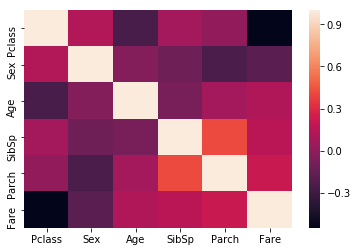

In [506]:
sns.heatmap(correlation)

In [545]:
from sklearn.ensemble import AdaBoostClassifier

In [554]:
model5 = AdaBoostClassifier(n_estimators=50)
model5.fit(train, labels)
predofada=model5.predict(train)

In [555]:
accuracy_score(predofada, train_y)

0.8271604938271605

In [116]:
import xgboost as xgb
xgb.XGBClassifier?

In [118]:
model6 = xgb.XGBClassifier(n_estimators=100,
                        n_jobs=-1,
                        booster='gbtree',
                        max_depth=12,
                        learning_rate=0.001,
                        silent=False,
                        subsample=1,
                        colsample_bytree=1
                       )

In [561]:
model6.fit(train, labels)
predofxgb=model6.predict(train)

In [562]:
accuracy_score(predofxgb, train_y)

0.8843995510662177

In [508]:
df.to_csv('submissionRF.csv')

In [ ]:
#After this choose the classifier with the best accuracy for future predictions

In [ ]:
import os
os.getcwd()